In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

def julia(height, width, max_iter, C):
    y, x = np.ogrid[2: -2: height*1j, -2: 2: width*1j]
    zs = x + y*1j
    diverged = max_iter*np.ones(zs.shape)
    
    for h in range(height):
        for w in range(width):
            z = zs[h][w]
            for i in range(max_iter):
                z = z**2 + C
                if z * np.conj(z) > 4:
                    diverged[h][w] = i
                    break

    return diverged


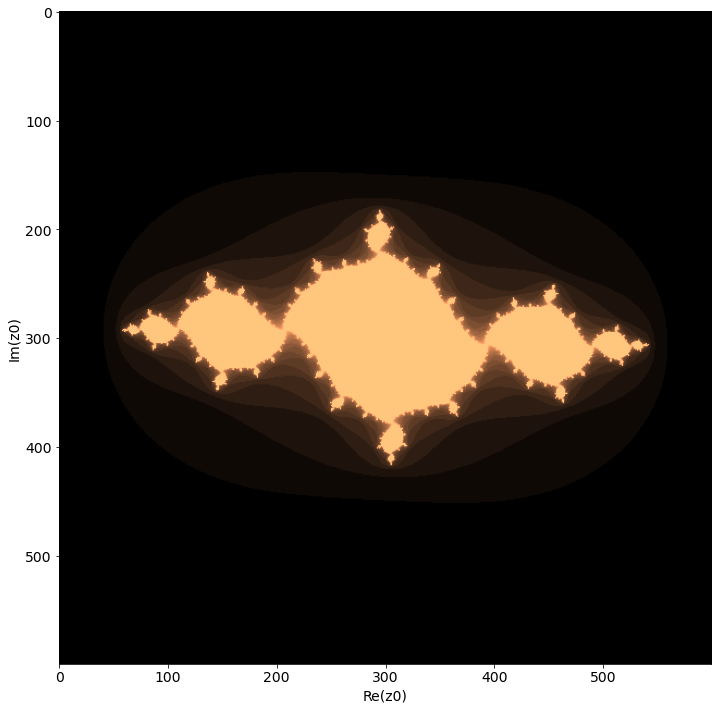

In [2]:
plt.rcParams["figure.figsize"] = (20,12) 
plt.rcParams["font.size"] = 14
plt.imshow(julia(600, 600, 20, -1.+ 0.1j), cmap='copper')
plt.xlabel('Re(z0)')
plt.ylabel('Im(z0)')
plt.show()
plt.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:34<00:00,  5.48s/it]


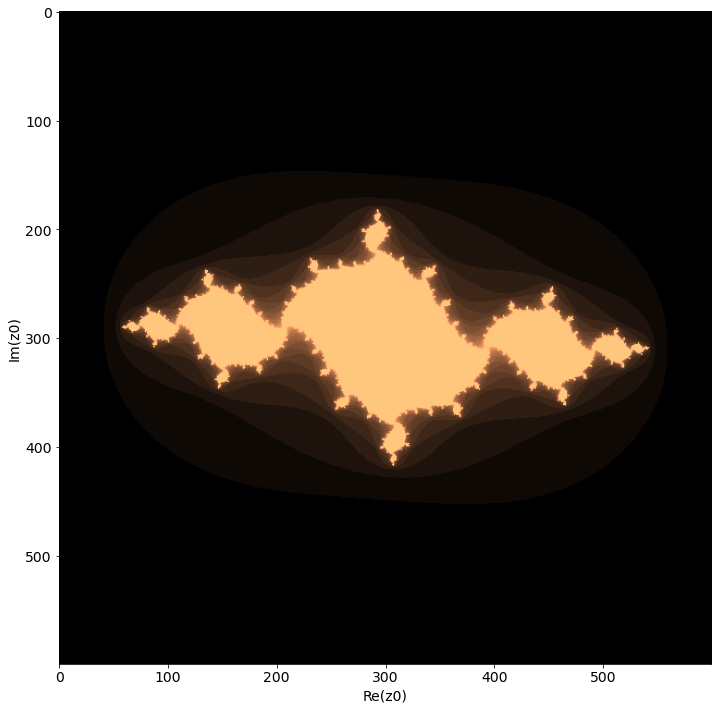

In [4]:
from tqdm import tqdm
import imageio

Cs = np.linspace(0, 2*np.pi, 50)
filenames = []
for i, angle in enumerate(tqdm(Cs)):
    C = -1 + 0.14*math.sin(angle)+0.14j*math.cos(angle)
    plt.imshow(julia(600, 600, 20, C), cmap='copper')
    plt.xlabel('Re(z0)')
    plt.ylabel('Im(z0)')
    plt.savefig(f"julia_{i}.png")
    filenames.append(f"julia_{i}.png")
frames = []
for filename in filenames:
    frames.append(imageio.imread(filename))
imageio.mimsave('JuliaSet.gif', frames)